# Proyek Analisis Data: BikeSharing
- **Nama:** Rico Widiyatma
- **Email:** ricowdytma22@gmail.com
- **ID Dicoding:** ricowidiyatma

## Menentukan Pertanyaan Bisnis


- pada bulam apa penyewaan sepeda mencappai puncak selama 1 tahun
- apakah penyewaan sepeda paling tinggi pada hari kerja atau libur dalam periode 4 musim
- pada jam berapa penyewaan sepeda paling tinggi dalam periode 1 tahun.


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
days_df = pd.read_csv("day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


pada tahap gathering ini menggunakan fungsi dari library pandas yaitu pd.read untuk membaca isi file dari day.csv maupun hour.csv

In [3]:
hours_df = pd.read_csv('hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


**Insight:**
- bisa di lihat pada masing masing file day dan hour menampilkan data dari 5 teratas

### Assessing Data

In [4]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


menggunakan fungsi info() untuk mengetahui jumlah baris data , non null data tidak hilang dan tipe data dari masing2 kolom


In [5]:
days_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


menggunakan fungsi isna() untuk mengetahui missing value dan sum() untuk menjumlahkan

In [6]:
print(("jumlah duplikasi :"),days_df.duplicated().sum())
days_df.describe()

jumlah duplikasi : 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


dengan fungsi duplicated() maka akan mencari duplikat data dan fungsi describe() untuk menampilkan deksripsi dari file tersebut

In [7]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15787 non-null  int64  
 1   dteday      15787 non-null  object 
 2   season      15787 non-null  int64  
 3   yr          15787 non-null  int64  
 4   mnth        15787 non-null  int64  
 5   hr          15787 non-null  int64  
 6   holiday     15787 non-null  int64  
 7   weekday     15787 non-null  int64  
 8   workingday  15787 non-null  int64  
 9   weathersit  15787 non-null  int64  
 10  temp        15787 non-null  float64
 11  atemp       15787 non-null  float64
 12  hum         15786 non-null  float64
 13  windspeed   15786 non-null  float64
 14  casual      15786 non-null  float64
 15  registered  15786 non-null  float64
 16  cnt         15786 non-null  float64
dtypes: float64(7), int64(9), object(1)
memory usage: 2.0+ MB


In [8]:
hours_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
print(("jumlah duplikasi :"),hours_df.duplicated().sum())
hours_df.describe()

jumlah duplikasi : 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15786.000000,15786.000000,15786.000000,15786.000000,15786.000000
mean,7894.000000,2.400329,0.452398,6.049154,11.545575,0.027174,2.998733,0.685627,1.414138,0.512642,0.489450,0.626009,0.190301,36.712593,152.213100,188.925694
std,4557.458685,1.054511,0.497745,3.220357,6.913412,0.162596,2.002943,0.464280,0.639724,0.193177,0.172296,0.194823,0.122143,50.043023,150.410195,181.542286
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3947.500000,1.000000,0.000000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.360000,0.348500,0.470000,0.104500,4.000000,34.000000,40.000000
50%,7894.000000,2.000000,0.000000,6.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.540000,0.500000,0.630000,0.194000,17.000000,114.000000,141.000000
75%,11840.500000,3.000000,1.000000,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,50.000000,218.000000,280.000000
max,15787.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- di file day.csv tidak ditemukan missing value, duplicate data , maupun innacurate value tetapi ada ketidaktepatan type data di file hour.csv pun hampir sama dengan file day.csv

### Cleaning Data

In [11]:
# dataframe day
datetime_columns = ["dteday"]
days_df[datetime_columns] = days_df[datetime_columns].apply(pd.to_datetime, format="%Y-%m-%d")
days_df.mnth = pd.to_datetime(days_df.mnth, format='%m').dt.strftime('%b')
days_df['season'] = days_df.season.astype('category')
days_df['holiday'] = days_df.holiday.astype('category')
days_df['workingday'] = days_df.workingday.astype('category')
days_df['weekday'] = days_df.weekday.astype('category')
days_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(4), datetime64

mengubah type data dengan menggunakan fungsi astype() mengubah dteday dengan menggunakan format tanggal dan untuk mnth format 1-12 dalam nama bulan jan dst

In [10]:
datetime_columns = ["dteday"]
hours_df[datetime_columns] = hours_df[datetime_columns].apply(pd.to_datetime, format="%Y-%m-%d")
hours_df.mnth = pd.to_datetime(hours_df.mnth, format='%m').dt.strftime('%b')
hours_df['season'] = hours_df.season.astype('category')
hours_df['holiday'] = hours_df.holiday.astype('category')
hours_df['workingday'] = hours_df.workingday.astype('category')
hours_df['weekday'] = hours_df.weekday.astype('category')
hours_df['weathershit'] = hours_df.weathersit.astype('category')
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      15787 non-null  int64         
 1   dteday       15787 non-null  datetime64[ns]
 2   season       15787 non-null  category      
 3   yr           15787 non-null  int64         
 4   mnth         15787 non-null  object        
 5   hr           15787 non-null  int64         
 6   holiday      15787 non-null  category      
 7   weekday      15787 non-null  category      
 8   workingday   15787 non-null  category      
 9   weathersit   15787 non-null  int64         
 10  temp         15787 non-null  float64       
 11  atemp        15787 non-null  float64       
 12  hum          15786 non-null  float64       
 13  windspeed    15786 non-null  float64       
 14  casual       15786 non-null  float64       
 15  registered   15786 non-null  float64       
 16  cnt 

In [12]:
hours_df.season.replace((1,2,3,4), ('winter','Spring','Summer','Fall'), inplace=True)
hours_df.workingday.replace((1,0), ('yes','no'), inplace=True)
hours_df.yr.replace((0,1), ('2011','2012'), inplace=True)

disini mengubah season yang awalnya berupa angka menggunakan fungsi replace() diubah ke dalam bentuk string dan begitu juga dengan workinday dan yr

In [13]:
hours_df['temp'] = hours_df['temp']*41
hours_df['atemp'] = hours_df['atemp']*50
hours_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weathershit
0,1,2011-01-01,winter,2011,Jan,0,0,6,no,1,9.84,14.395,0.81,0.0,3.0,13.0,16.0,1
1,2,2011-01-01,winter,2011,Jan,1,0,6,no,1,9.02,13.635,0.80,0.0,8.0,32.0,40.0,1
2,3,2011-01-01,winter,2011,Jan,2,0,6,no,1,9.02,13.635,0.80,0.0,5.0,27.0,32.0,1
3,4,2011-01-01,winter,2011,Jan,3,0,6,no,1,9.84,14.395,0.75,0.0,3.0,10.0,13.0,1
4,5,2011-01-01,winter,2011,Jan,4,0,6,no,1,9.84,14.395,0.75,0.0,0.0,1.0,1.0,1


mengubah value di temp dan atemp dan dikali dengan angka 41 dan 50 agar mudah di pahami dalam suhu atau derajat yang seblumnya rentang 0-1

In [14]:

days_df.workingday.replace((1,0), ('yes','no'), inplace=True)
days_df.season.replace((1,2,3,4), ('winter','Spring','Summer','Fall'), inplace=True)
days_df.yr.replace((0,1), ('2011','2012'), inplace=True)
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,Jan,0,6,no,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,winter,2011,Jan,0,0,no,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,winter,2011,Jan,0,1,yes,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,winter,2011,Jan,0,2,yes,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,winter,2011,Jan,0,3,yes,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- setelah melakukan pembersihan data disini kita bisa melihat value yang seusai seperti dtedaay menjadi format tanggal dengan tipe data yang benar dan season dibuah menjadi string dengan begini bisa melihat data dengan nampak jelas dan dapat mudah di mengerti agar bisa melanjutkan tahap explorasi data dengan lebih mudah


## Exploratory Data Analysis (EDA)

### Explore ...

In [15]:
days_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731,731,731.0,731.0,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,2,12,2.0,7.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Summer,2012,Jan,0.0,0.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,366,62,710.0,105.0,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


fungsi describe() untuk melihat ringkasa statistik dan disertakan fungsi include=all yaitu masuk semua tanpa ada pengecualian

In [16]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weathershit
count,15787.000000,15787,15787,15787,15787,15787.000000,15787.0,15787.0,15787,15787.000000,15787.000000,15787.000000,15786.000000,15786.000000,15786.000000,15786.000000,15786.000000,15787.0
unique,NaN,NaN,4,2,12,NaN,2.0,7.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
top,NaN,NaN,Summer,2011,May,NaN,0.0,6.0,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
freq,NaN,NaN,4496,8645,1488,NaN,15358.0,2272.0,10824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10561.0
mean,7894.000000,2011-11-29 19:08:17.801988864,NaN,NaN,NaN,11.545575,NaN,NaN,NaN,1.414138,21.018324,24.472495,0.626009,0.190301,36.712593,152.213100,188.925694,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,3947.500000,2011-06-18 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,1.000000,14.760000,17.425000,0.470000,0.104500,4.000000,34.000000,40.000000,NaN
50%,7894.000000,2011-11-30 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,1.000000,22.140000,25.000000,0.630000,0.194000,17.000000,114.000000,141.000000,NaN
75%,11840.500000,2012-05-13 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,2.000000,27.060000,31.060000,0.780000,0.253700,50.000000,218.000000,280.000000,NaN
max,15787.000000,2012-10-24 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,4.000000,41.000000,50.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN


In [17]:
days_df.groupby('season').agg({'cnt': ['max', 'min', 'mean']
}).reindex (['Spring', 'Summer', 'Fall', 'Winter',])

<ipython-input-17-91c7d0bd1b21>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby('season').agg({'cnt': ['max', 'min', 'mean']


cnt                     
           max     min         mean
season                             
Spring  8362.0   795.0  4992.331522
Summer  8714.0  1115.0  5644.303191
Fall    8555.0    22.0  4728.162921
Winter     NaN     NaN          NaN

In [18]:
days_df.groupby(by='workingday').agg({
    'cnt': ['max', 'min', 'mean']
})

<ipython-input-18-8ae694b72eca>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  days_df.groupby(by='workingday').agg({


cnt                  
             max  min         mean
workingday                        
no          8714  605  4330.168831
yes         8362   22  4584.820000

fungsi groupby yaitu mengelompokan berdasarkan kolom disini menggunakan kolom working day dan fungsi agg ini untuk menerapakn satu atau lebih tambahan fungsi agregasi.

In [19]:
main_data = hours_df
main_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weathershit
0,1,2011-01-01,winter,2011,Jan,0,0,6,no,1,9.84,14.395,0.81,0.0,3.0,13.0,16.0,1
1,2,2011-01-01,winter,2011,Jan,1,0,6,no,1,9.02,13.635,0.80,0.0,8.0,32.0,40.0,1
2,3,2011-01-01,winter,2011,Jan,2,0,6,no,1,9.02,13.635,0.80,0.0,5.0,27.0,32.0,1
3,4,2011-01-01,winter,2011,Jan,3,0,6,no,1,9.84,14.395,0.75,0.0,3.0,10.0,13.0,1
4,5,2011-01-01,winter,2011,Jan,4,0,6,no,1,9.84,14.395,0.75,0.0,0.0,1.0,1.0,1


main_data disini sebagai penampung dari file hour.csv yang nantinya bisa di unduh untuk membuat file baru yang sudah bersih

**Insight:**
- disini kita bisa melihat tidak ada kesenjangan nilai yang signifikan maupun incurate value
- dalam season yang di hitung total penyewa max nya di musim summer maka dengan ini bisa melakukan promosi di bulan summer agar memaksimalkan lagi
- dengan memperhatikan juga frekuensi paling tinggi di hari libur maka bisa menjadi sasaran empuk untuk meingkatkan produktifitas penyewaan di hari libur dan di musim summer.

## Visualization & Explanatory Analysis

### Pertanyaan 1: pada bulan apa penyewaan sepeda mencappai puncak selama 1 tahun

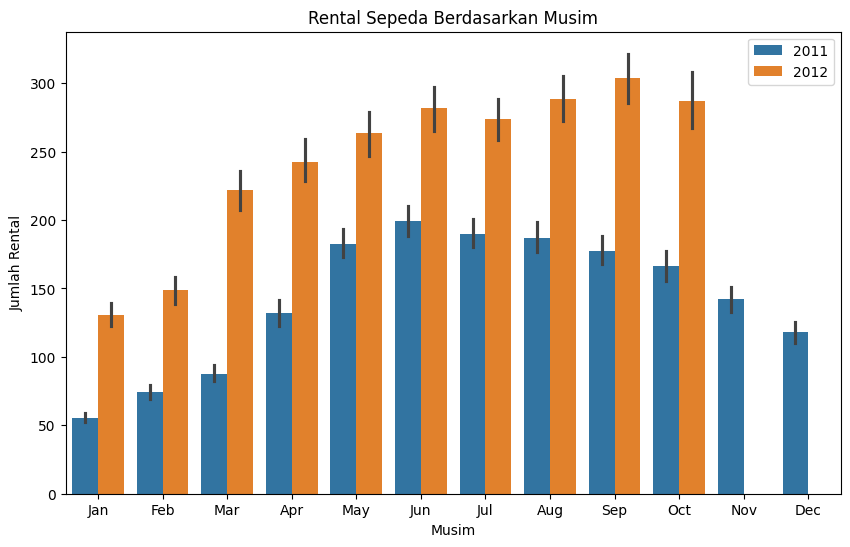

In [20]:
plt.figure(figsize = (10,6))
sns.barplot(x ='mnth',y = 'cnt', data = hours_df, hue = 'yr' )
plt.title('Rental Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Rental')
plt.legend()
plt.show()

**Insight:**
- peminjaman tertinggi pada bikesharing yaitu pada bulan september untuk tahun 2012

- peminjaman tertinggi pada bikesharing yaitu pada bulan juni untuk tahun 2011

### Pertanyaan 2: apakah penyewaan sepeda paling tinggi pada hari kerja atau libur dalam periode 4 musim

<function matplotlib.pyplot.show(close=None, block=None)>

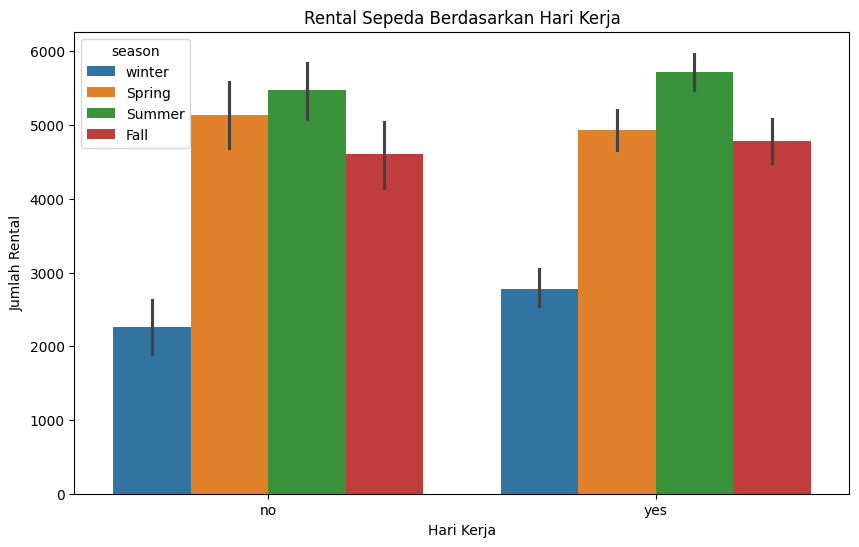

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='workingday', y='cnt', data=days_df, hue = 'season')
plt.title('Rental Sepeda Berdasarkan Hari Kerja')
plt.xlabel('Hari Kerja')
plt.ylabel('Jumlah Rental')
plt.show

**Insight:**
- peminjaman sepeda paling tinggi di di hari libur dan di musim summer karena pada musim summer ini langitnya biasanya cerah


### Pertanyaan 3: pada jam berapa penyewaan sepeda paling tinggi dalam periode 1 tahun

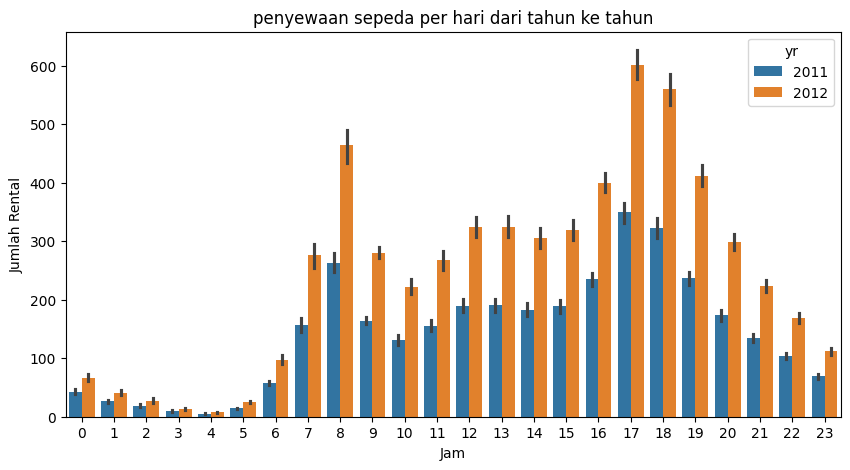

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(data=hours_df, x='hr', y='cnt', hue='yr')
plt.xlabel('Jam')
plt.ylabel('Jumlah Rental')
plt.title('penyewaan sepeda per hari dari tahun ke tahun')
plt.show()

disini dapat dilihat rata peminjaman sepeda di pagi hari jam 8 dan di sore hari antara  jam 17 - 18 karena waktu tersebut cocok untuk dijadikan waktu olahrga


## Analisis Lanjutan (Opsional)

<ipython-input-23-88cf357a022f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='temp_bin', data=hours_df, palette='coolwarm')


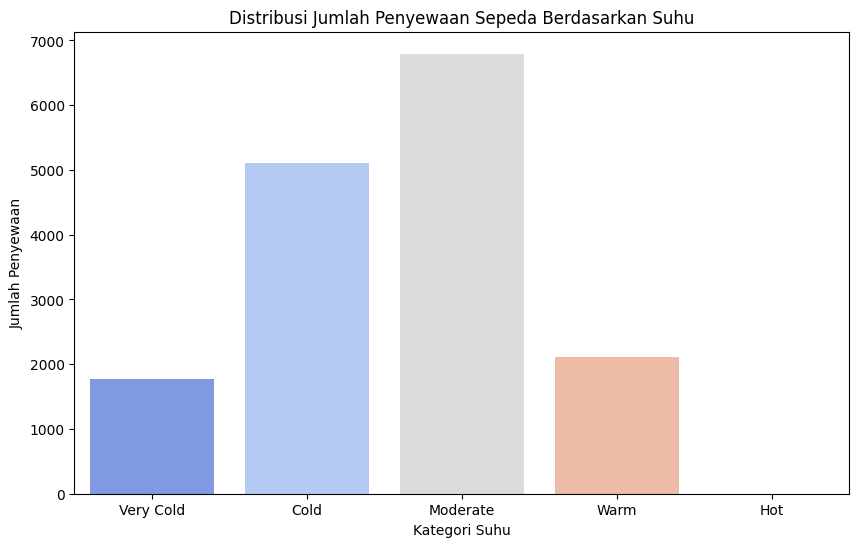

In [23]:
bins_temp = [0, 10, 20, 30, 40, 50]
labels_temp = ['Very Cold', 'Cold', 'Moderate', 'Warm', 'Hot']
hours_df['temp_bin'] = pd.cut(hours_df['temp'], bins=bins_temp, labels=labels_temp, right=False)


plt.figure(figsize=(10, 6))
sns.countplot(x='temp_bin', data=hours_df, palette='coolwarm')
plt.title('Distribusi Jumlah Penyewaan Sepeda Berdasarkan Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Jumlah Penyewaan')
plt.show()

tujuan analisi data lanjutan disini menggunakan teknik clustering dengan manual group untuk mengelompokan suhu ke temperature yang dimana ada very cold untuk suhu 10 atau di bawahnya dan cold untuk 20 , moderate untuk suhu di 30 serajat adapun warn dan hot dengan masing2 suhu 40 dan 50 bertujuan agar bisa terdefinisi kalau derajat ini apa temperaturnya.

## Conclusion

- Conclution pertanyaan 1 :pada bulan apa penyewaan sepeda mencappai puncak selama 1 tahun ?<br>Penyewaan sepeda mencapai puncaknya pada bulan September 2012.Ini menunjukkan bahwa bulan tersebut mungkin memiliki kondisi cuaca yang ideal dan mungkin juga adanya acara atau kegiatan yang menarik minat lebih banyak orang untuk menggunakan sepeda.
- Conclution pertanyaan 2 :pada jam berapa penyewaan sepeda paling tinggi dalam periode 1 tahun<br>Penyewaan sepeda paling tinggi terjadi pada pagi hari sekitar jam 8 dan sore hari antara jam 17 - 18. Jam-jam ini biasanya bertepatan dengan waktu orang berangkat dan pulang kerja, yang menjadikan sepeda sebagai pilihan transportasi yang praktis.
- conlcution pertanyaan 3 : pada jam berapa penyewaan sepeda paling tinggi dalam periode 1 tahun<br>Penyewaan sepeda paling tinggi terjadi pada hari libur, terutama di musim summer. Ini bisa jadi karena kondisi cuaca yang cerah dan orang-orang cenderung beraktivitas di luar ruangan, baik untuk olahraga maupun rekreasi.

In [ ]:
main_data = hours_df
main_data.to_csv('main_data.csv', index=False)